# Some plots of index trends and all events compounding trends

This file grabs the warm season indeces and sees if this shows us anything


You need to run cmipIndeces.ipnyb first

In [1]:
#For plots of a single experiment to demonstrate things, plot this one:
mToPlot = 'BCC-CSM2-MR'

In [2]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.overlapBins as overlapBins


In [3]:
import xarray
import matplotlib.pyplot as plt
import numpy
import pandas

%matplotlib inline

In [4]:
firePos=xarray.open_dataset('results/cmip6Compounds.nc').sel(year=slice(1850,2099), fire='pos', experiment='ssp585', drop=True)

fireNeg=xarray.open_dataset('results/cmip6Compounds.nc').sel(year=slice(1850,2099), fire='neg', experiment='ssp585', drop=True)

In [5]:
firePos

<xarray.Dataset>
Dimensions:                    (compound: 9, model: 38, year: 250)
Coordinates:
  * model                      (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * year                       (year) int64 1850 1851 1852 ... 2097 2098 2099
  * compound                   (compound) object 'nEvents' ... 'anyCompound'
Data variables: (12/16)
    nino34EastioSamwinter      (compound, model, year) float64 ...
    nino34EastioSamsummer      (compound, model, year) float64 ...
    nino34DmiSamwinter         (compound, model, year) float64 ...
    nino34DmiSamsummer         (compound, model, year) float64 ...
    cIndexEastioSamwinter      (compound, model, year) float64 ...
    cIndexEastioSamsummer      (compound, model, year) float64 ...
    ...                         ...
    eIndexDmiSamwinter         (compound, model, year) float64 ...
    eIndexDmiSamsummer         (compound, model, year) float64 ...
    ecCombinedEastioSamwinter  (compound, model, year) float64 ...
    ecCombinedEastioSamsummer  (compound, model, year) float64 ...
    ecCombinedDmiSamwinter     (compound, model, year) float64 ...
    ecCombinedDmiSamsummer     (compound, model, year) float64 ...
Attributes:
    indexNames:  ['eIndex', 'eastIO', 'samWinter']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']

# Overlapping bins

As compounds in individual years are not very good for determining trends, lets put them in 30 year bins

In [6]:
overlapBinFirePos=overlapBins.binSum(firePos)
overlapBinFireNeg=overlapBins.binSum(fireNeg)


In [7]:
overlapBinFireNeg

<xarray.Dataset>
Dimensions:                    (compound: 9, model: 38, year: 22)
Coordinates:
  * model                      (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * compound                   (compound) object 'nEvents' ... 'anyCompound'
  * year                       (year) int64 1865 1875 1885 ... 2055 2065 2075
Data variables: (12/16)
    nino34EastioSamwinter      (year, compound, model) float64 20.0 17.0 ... 0.0
    nino34EastioSamsummer      (year, compound, model) float64 17.0 18.0 ... 2.0
    nino34DmiSamwinter         (year, compound, model) float64 17.0 17.0 ... 0.0
    nino34DmiSamsummer         (year, compound, model) float64 14.0 18.0 ... 2.0
    cIndexEastioSamwinter      (year, compound, model) float64 17.0 12.0 ... 0.0
    cIndexEastioSamsummer      (year, compound, model) float64 14.0 13.0 ... 0.0
    ...                         ...
    eIndexDmiSamwinter         (year, compound, model) float64 26.0 13.0 ... 0.0
    eIndexDmiSamsummer         (year, compound, model) float64 23.0 14.0 ... 0.0
    ecCombinedEastioSamwinter  (year, compound, model) float64 29.0 13.0 ... 0.0
    ecCombinedEastioSamsummer  (year, compound, model) float64 26.0 14.0 ... 0.0
    ecCombinedDmiSamwinter     (year, compound, model) float64 26.0 13.0 ... 0.0
    ecCombinedDmiSamsummer     (year, compound, model) float64 23.0 14.0 ... 0.0
Attributes:
    indexNames:  ['eIndex', 'eastIO', 'samWinter']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']
    Bins:        Overlapping 30 year bins, seperating by 10 year intervals
    Year:        Midpoint of bin

In [8]:
overlapBinFirePos.nino34DmiSamsummer.to_dataset('compound').isel(model=5)

<xarray.Dataset>
Dimensions:      (year: 22)
Coordinates:
    model        <U10 'CAS-ESM2-0'
  * year         (year) int64 1865 1875 1885 1895 1905 ... 2045 2055 2065 2075
Data variables:
    nEvents      (year) float64 19.0 19.0 22.0 21.0 20.0 ... 25.0 21.0 24.0 24.0
    all3         (year) float64 2.0 1.0 1.0 1.0 1.0 0.0 ... 1.0 1.0 0.0 0.0 0.0
    enso+iod     (year) float64 0.0 0.0 0.0 0.0 0.0 1.0 ... 2.0 3.0 5.0 7.0 6.0
    enso+sam     (year) float64 2.0 3.0 4.0 3.0 3.0 2.0 ... 1.0 1.0 1.0 0.0 0.0
    iod+sam      (year) float64 0.0 0.0 1.0 2.0 2.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    enso         (year) float64 0.0 2.0 2.0 2.0 0.0 0.0 ... 2.0 2.0 1.0 0.0 0.0
    iod          (year) float64 4.0 3.0 1.0 2.0 2.0 ... 13.0 12.0 8.0 10.0 12.0
    sam          (year) float64 5.0 5.0 6.0 4.0 5.0 6.0 ... 0.0 0.0 0.0 0.0 0.0
    anyCompound  (year) float64 4.0 4.0 6.0 6.0 6.0 4.0 ... 4.0 5.0 6.0 7.0 6.0

In [9]:
binnedPosCount = overlapBinFirePos.nino34DmiSamsummer.sel(compound='anyCompound')
binnedNegCount = overlapBinFireNeg.nino34DmiSamsummer.sel(compound='anyCompound')

Text(0.5, 1.0, 'Compound events in non-overlapping 30 year bins for ssp585 results.')

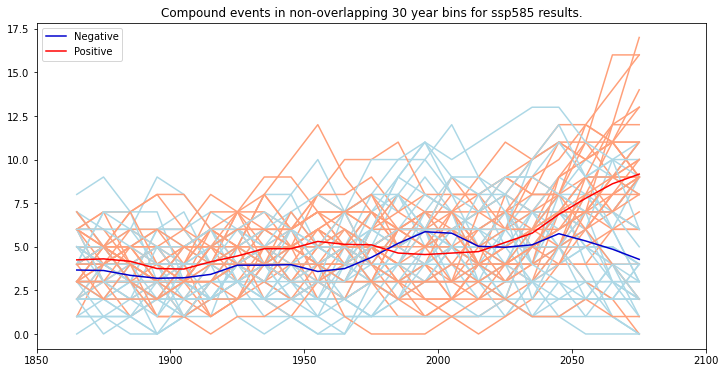

In [10]:
fig = plt.figure(figsize=(12,6))

for iMod in binnedNegCount.model.values:
    plt.plot(binnedNegCount.year, binnedNegCount.sel(model=iMod).values, color='lightblue')
    plt.plot(binnedPosCount.year, binnedPosCount.sel(model=iMod).values, color='lightsalmon')
    
plt.plot(binnedNegCount.year, binnedNegCount.mean(dim='model') , color='mediumblue', label='Negative')
plt.plot(binnedPosCount.year, binnedPosCount.mean(dim='model') , color='red', label = 'Positive')   

plt.xlim(1850, 2100)
plt.legend()
plt.title('Compound events in non-overlapping 30 year bins for ssp585 results.')

Text(0.5, 1.0, 'Number of Compound Not Fire-Promoting')

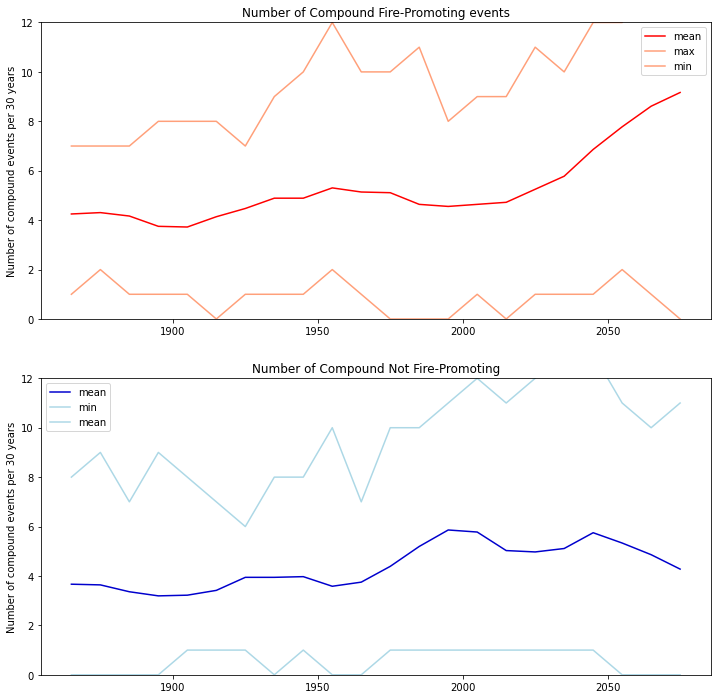

In [11]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
    
plt.plot(binnedPosCount.year, binnedPosCount.mean(dim='model') , color='red', label='mean')   
plt.plot(binnedPosCount.year, binnedPosCount.max(dim='model') , color='lightsalmon', label='max')
plt.plot(binnedPosCount.year, binnedPosCount.min(dim='model') , color='lightsalmon', label='min')

plt.legend()

plt.ylim([0,12])
plt.ylabel('Number of compound events per 30 years')
plt.title('Number of Compound Fire-Promoting events')

plt.subplot(2,1,2)
    
plt.plot(binnedNegCount.year, binnedNegCount.mean(dim='model') , color='mediumblue', label='mean')
plt.plot(binnedNegCount.year, binnedNegCount.max(dim='model') , color='lightblue', label='min')
plt.plot(binnedNegCount.year, binnedNegCount.min(dim='model') , color='lightblue', label='mean')

plt.legend()

plt.ylim([0,12])
plt.ylabel('Number of compound events per 30 years')
plt.title('Number of Compound Not Fire-Promoting')

# And by event type

It looks like there is a trend of increasing number of compounds, so lets look at which event pairs are most common

In [12]:
overlapBinFireNeg

<xarray.Dataset>
Dimensions:                    (compound: 9, model: 38, year: 22)
Coordinates:
  * model                      (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * compound                   (compound) object 'nEvents' ... 'anyCompound'
  * year                       (year) int64 1865 1875 1885 ... 2055 2065 2075
Data variables: (12/16)
    nino34EastioSamwinter      (year, compound, model) float64 20.0 17.0 ... 0.0
    nino34EastioSamsummer      (year, compound, model) float64 17.0 18.0 ... 2.0
    nino34DmiSamwinter         (year, compound, model) float64 17.0 17.0 ... 0.0
    nino34DmiSamsummer         (year, compound, model) float64 14.0 18.0 ... 2.0
    cIndexEastioSamwinter      (year, compound, model) float64 17.0 12.0 ... 0.0
    cIndexEastioSamsummer      (year, compound, model) float64 14.0 13.0 ... 0.0
    ...                         ...
    eIndexDmiSamwinter         (year, compound, model) float64 26.0 13.0 ... 0.0
    eIndexDmiSamsummer         (year, compound, model) float64 23.0 14.0 ... 0.0
    ecCombinedEastioSamwinter  (year, compound, model) float64 29.0 13.0 ... 0.0
    ecCombinedEastioSamsummer  (year, compound, model) float64 26.0 14.0 ... 0.0
    ecCombinedDmiSamwinter     (year, compound, model) float64 26.0 13.0 ... 0.0
    ecCombinedDmiSamsummer     (year, compound, model) float64 23.0 14.0 ... 0.0
Attributes:
    indexNames:  ['eIndex', 'eastIO', 'samWinter']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']
    Bins:        Overlapping 30 year bins, seperating by 10 year intervals
    Year:        Midpoint of bin

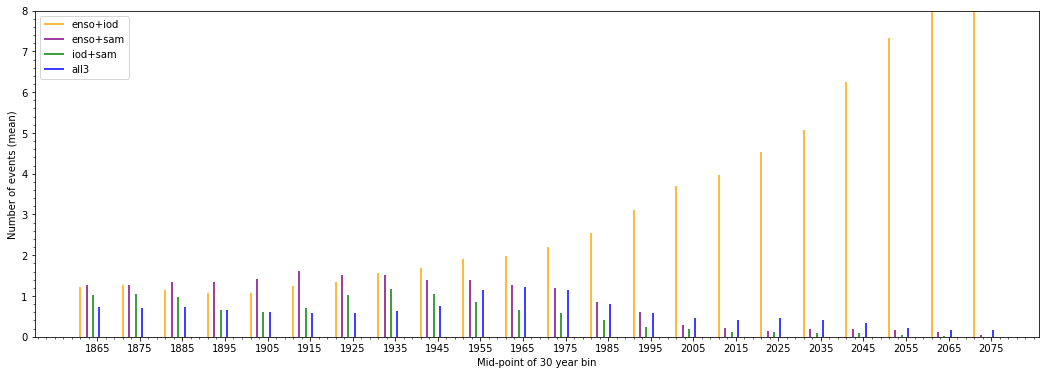

In [13]:
overlapBins.binPlot(overlapBinFirePos.nino34DmiSamsummer.to_dataset('compound'))

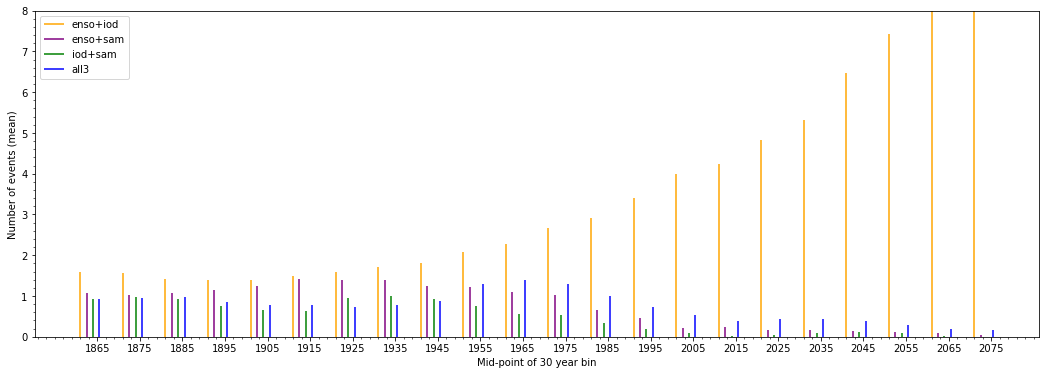

In [14]:
overlapBins.binPlot(overlapBinFirePos.nino34EastioSamsummer.to_dataset('compound'))

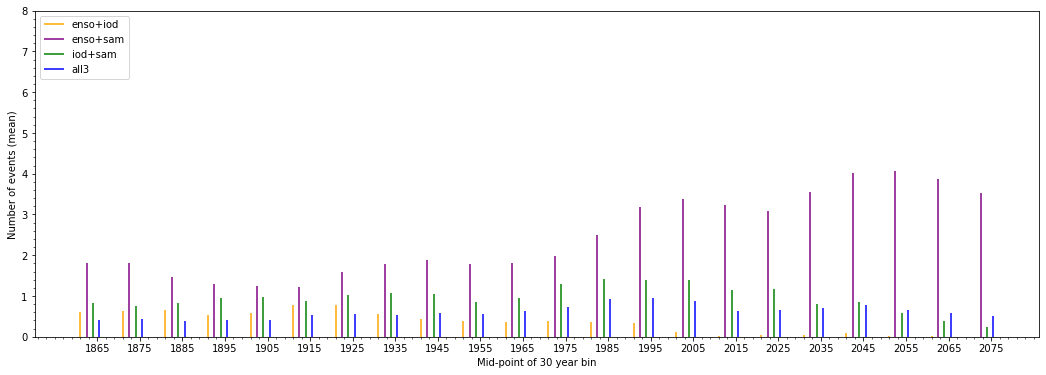

In [15]:
overlapBins.binPlot(overlapBinFireNeg.nino34DmiSamsummer.to_dataset('compound'))

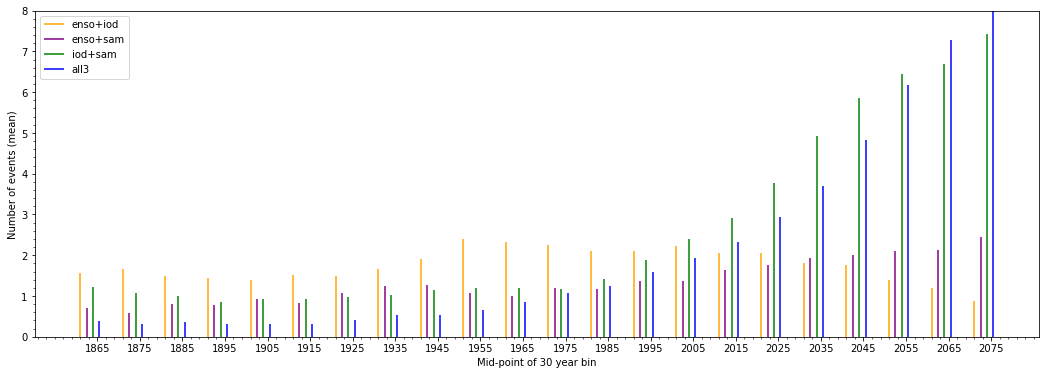

In [16]:
overlapBins.binPlot(overlapBinFirePos.nino34DmiSamwinter.to_dataset('compound'))

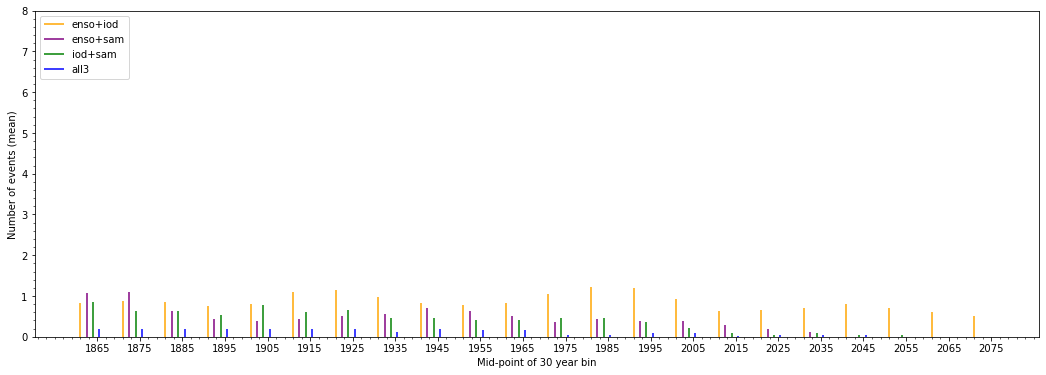

In [17]:
overlapBins.binPlot(overlapBinFireNeg.nino34DmiSamwinter.to_dataset('compound'))

# Time of emergence

In [48]:
%run utils/emergence.ipynb

Using pi control as the background/mean state:

In [19]:
piControlXr=xarray.open_dataset('results/cmip6Compounds.nc').sel(fire='pos', experiment='piControl', drop=True)

climatList = list()

#using bin sum is a bit funky because the models have different start and end years
#run binSum for each model seperately, after filtering the nans
for iModel in piControlXr.model.values:
    try:
        climatList.append(overlapBins.binSum(piControlXr.where(piControlXr.sel(model=iModel).isnull()!=True, drop=True)))
    except Exception as e:
        print(iModel)
        print(e)
        
piControlBinSumXr = xarray.merge(climatList)

In [20]:
piControlBinSumXr

<xarray.Dataset>
Dimensions:                    (compound: 9, model: 38, year: 947)
Coordinates:
  * compound                   (compound) object 'all3' 'anyCompound' ... 'sam'
  * year                       (year) int64 16 26 36 46 ... 7844 7854 7864 7874
  * model                      (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
Data variables: (12/16)
    nino34EastioSamwinter      (year, compound, model) float64 nan nan ... nan
    nino34EastioSamsummer      (year, compound, model) float64 nan nan ... nan
    nino34DmiSamwinter         (year, compound, model) float64 nan nan ... nan
    nino34DmiSamsummer         (year, compound, model) float64 nan nan ... nan
    cIndexEastioSamwinter      (year, compound, model) float64 nan nan ... nan
    cIndexEastioSamsummer      (year, compound, model) float64 nan nan ... nan
    ...                         ...
    eIndexDmiSamwinter         (year, compound, model) float64 nan nan ... nan
    eIndexDmiSamsummer         (year, compound, model) float64 nan nan ... nan
    ecCombinedEastioSamwinter  (year, compound, model) float64 nan nan ... nan
    ecCombinedEastioSamsummer  (year, compound, model) float64 nan nan ... nan
    ecCombinedDmiSamwinter     (year, compound, model) float64 nan nan ... nan
    ecCombinedDmiSamsummer     (year, compound, model) float64 nan nan ... nan
Attributes:
    indexNames:  ['eIndex', 'eastIO', 'samWinter']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']
    Bins:        Overlapping 30 year bins, seperating by 10 year intervals
    Year:        Midpoint of bin

Do a plot to show time of emergence.
Using mean/min/max in each interval as the trend, and number of events (95%CI) in piControl as the baseline

In [21]:
overlapBinFirePos.nino34DmiSamsummer.to_dataset()

<xarray.Dataset>
Dimensions:             (compound: 9, model: 38, year: 22)
Coordinates:
  * model               (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * compound            (compound) object 'nEvents' 'all3' ... 'anyCompound'
  * year                (year) int64 1865 1875 1885 1895 ... 2045 2055 2065 2075
Data variables:
    nino34DmiSamsummer  (year, compound, model) float64 27.0 10.0 ... 9.0 8.0

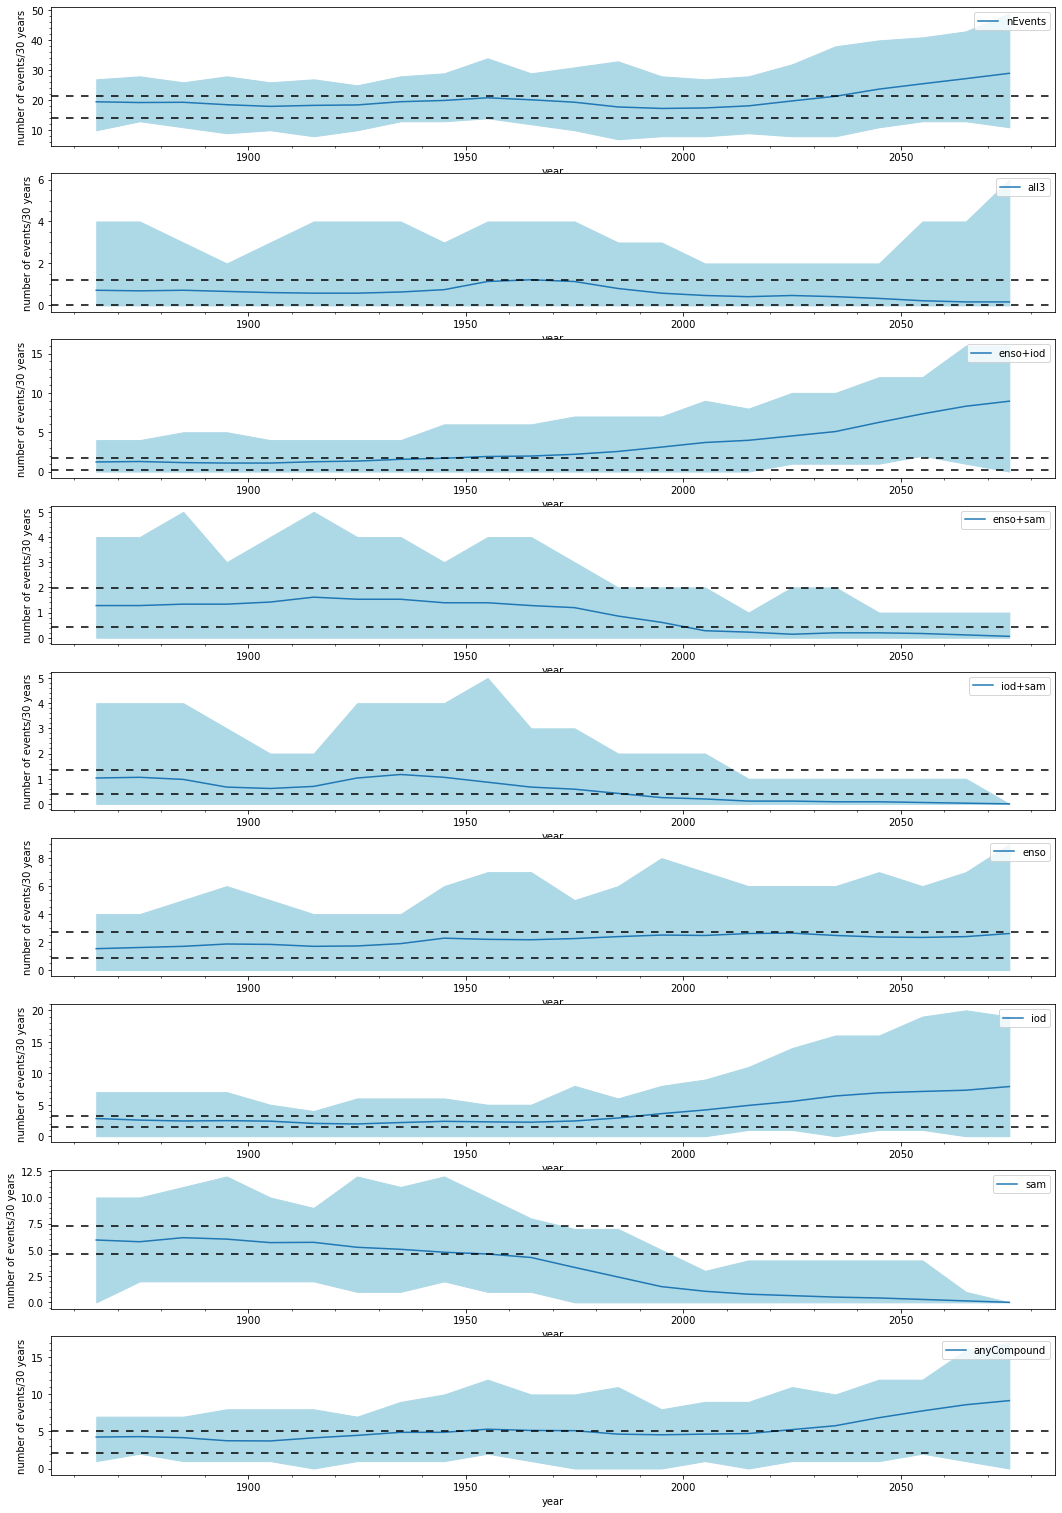

In [22]:
emergePlot(
    overlapBinFirePos.nino34DmiSamsummer.to_dataset('compound'), 
    piControlBinSumXr.nino34DmiSamsummer.to_dataset('compound')
)

Again for fire neg

In [23]:
piControlFireNegXr=xarray.open_dataset('results/cmip6Compounds.nc'
                                      ).sel(fire='neg', experiment='piControl', drop=True)

In [24]:
climatList = list()

#using bin sum is a bit funky because the models have different start and end years
#run binSum for each model seperately, after filtering the nans
for iModel in piControlXr.model.values:
    try:
        climatList.append(
            overlapBins.binSum(
                piControlFireNegXr.where(piControlFireNegXr.sel(model=iModel).isnull()!=True, drop=True)
            )
        )
    except Exception as e:
        print(iModel)
        print(e)
        
piControlFireNegBinSumXr = xarray.merge(climatList)

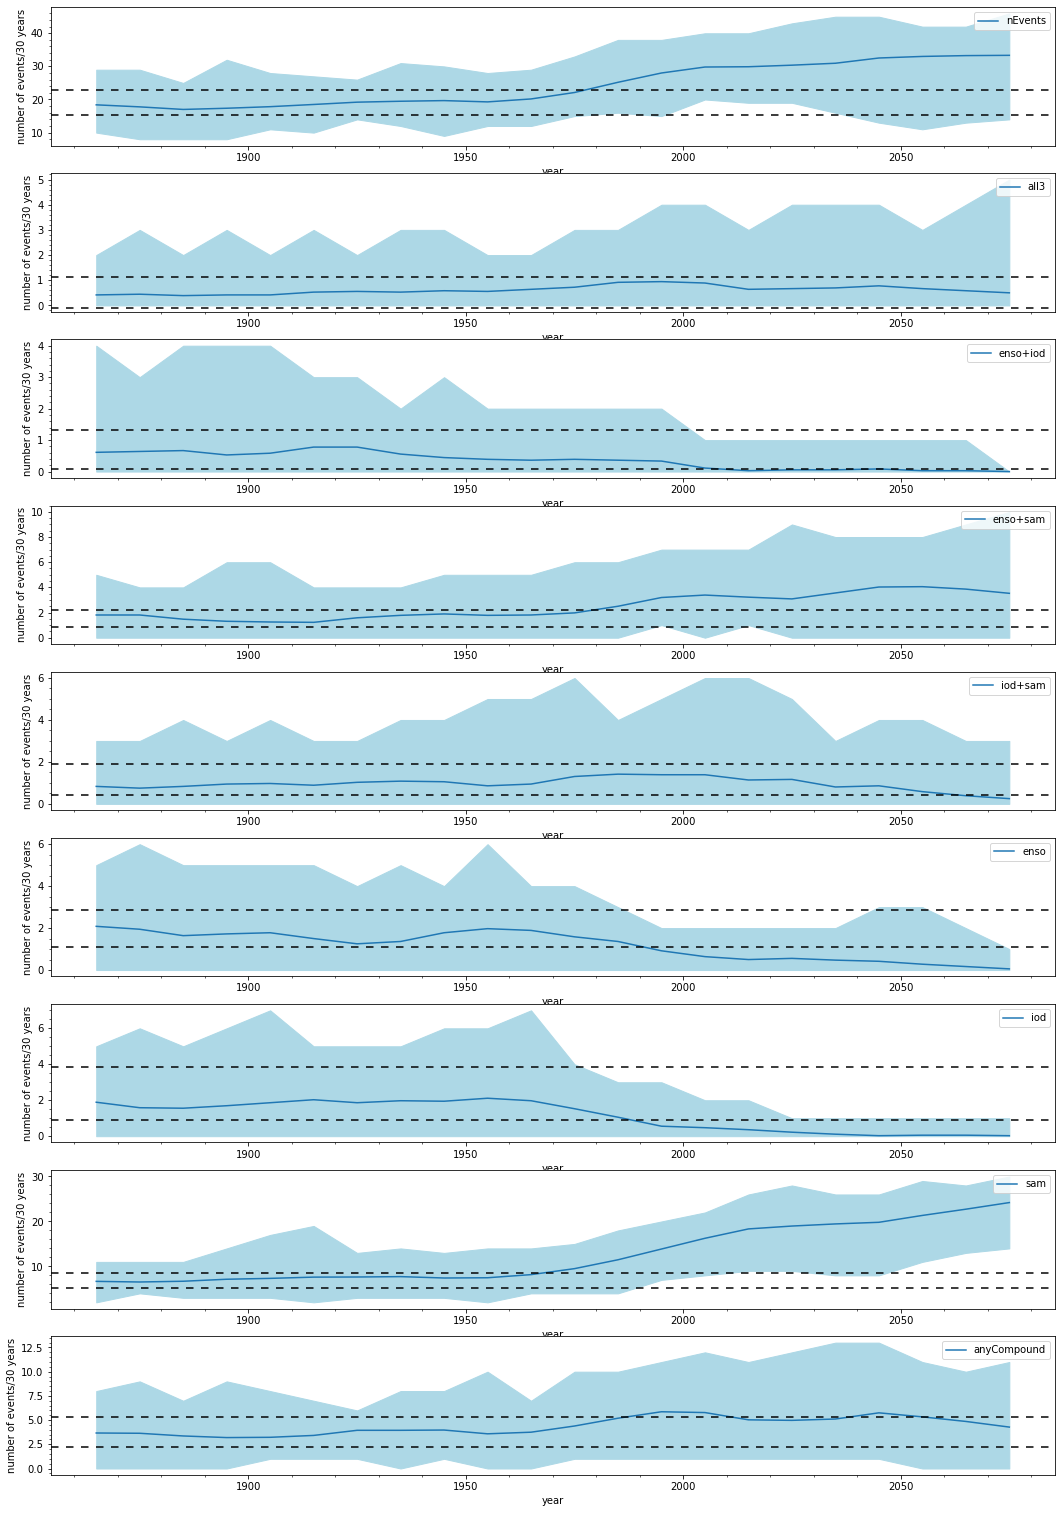

In [25]:
emergePlot(
    overlapBinFireNeg.nino34DmiSamsummer.to_dataset('compound'), 
    piControlFireNegBinSumXr.nino34DmiSamsummer.to_dataset('compound')
)

# Index comparisons - IOD

In [26]:
overlapBinFirePos.to_array().sel(compound='enso+iod', variable=['nino34EastioSamsummer', 'nino34DmiSamsummer']).to_dataset('variable')

<xarray.Dataset>
Dimensions:                (model: 38, year: 22)
Coordinates:
  * model                  (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
    compound               <U8 'enso+iod'
  * year                   (year) int64 1865 1875 1885 1895 ... 2055 2065 2075
Data variables:
    nino34EastioSamsummer  (year, model) float64 1.0 0.0 1.0 ... 11.0 9.0 9.0
    nino34DmiSamsummer     (year, model) float64 2.0 0.0 2.0 ... 10.0 9.0 8.0
Attributes:
    indexNames:  ['eIndex', 'eastIO', 'samWinter']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']
    Bins:        Overlapping 30 year bins, seperating by 10 year intervals
    Year:        Midpoint of bin

In [27]:
piControlBinSumXr.to_array().sel(compound='enso+iod', variable=['nino34EastioSamsummer', 'nino34DmiSamsummer'], drop=True).to_dataset('variable')

<xarray.Dataset>
Dimensions:                (model: 38, year: 947)
Coordinates:
  * year                   (year) int64 16 26 36 46 56 ... 7844 7854 7864 7874
  * model                  (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
Data variables:
    nino34EastioSamsummer  (year, model) float64 nan nan nan nan ... nan nan nan
    nino34DmiSamsummer     (year, model) float64 nan nan nan nan ... nan nan nan
Attributes:
    indexNames:  ['eIndex', 'eastIO', 'samWinter']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']
    Bins:        Overlapping 30 year bins, seperating by 10 year intervals
    Year:        Midpoint of bin

enso+iod


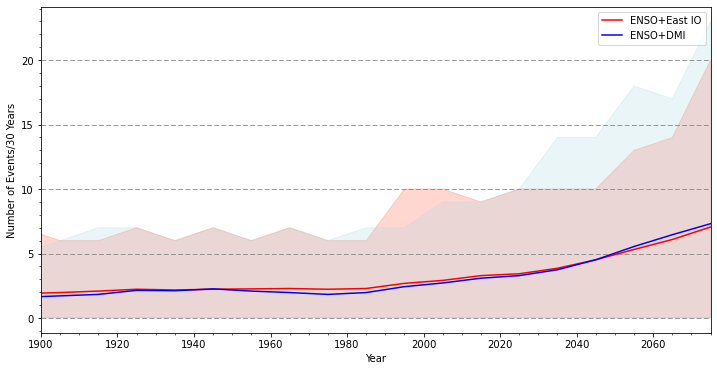

In [53]:
print('enso+iod')
overlaidEmergePlot(
    overlapBinFirePos.to_array().sel(
        compound='enso+iod', 
        variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], 
        drop=True
    ).to_dataset('variable'), 
    #piControlBinSumXr.to_array().sel(compound='enso+iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable')
)
plt.legend(['El Niño+East IO','El Niño+DMI'])
plt.xlim([1900,2075])
plt.savefig('results/ENSO+dmiandEastIO.png')

iod without Enso


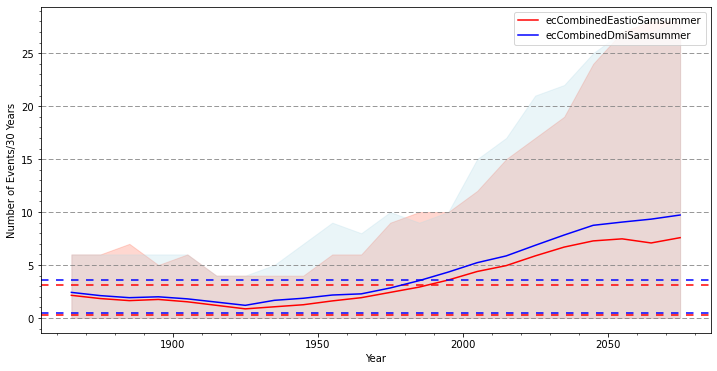

In [50]:
print('iod without Enso')
overlaidEmergePlot(
    overlapBinFirePos.to_array().sel(compound='iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable'), 
    piControlBinSumXr.to_array().sel(compound='iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable')
)



enso+iod


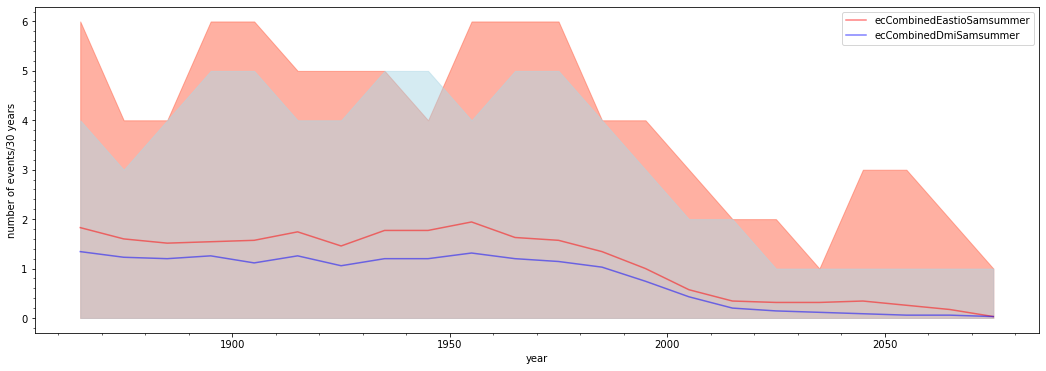

In [34]:
print('enso+iod')
overlaidEmergePlot(
    overlapBinFireNeg.to_array().sel(compound='enso+iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable'), 
    piControlFireNegBinSumXr.to_array().sel(compound='enso+iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable')
)



iod without Enso


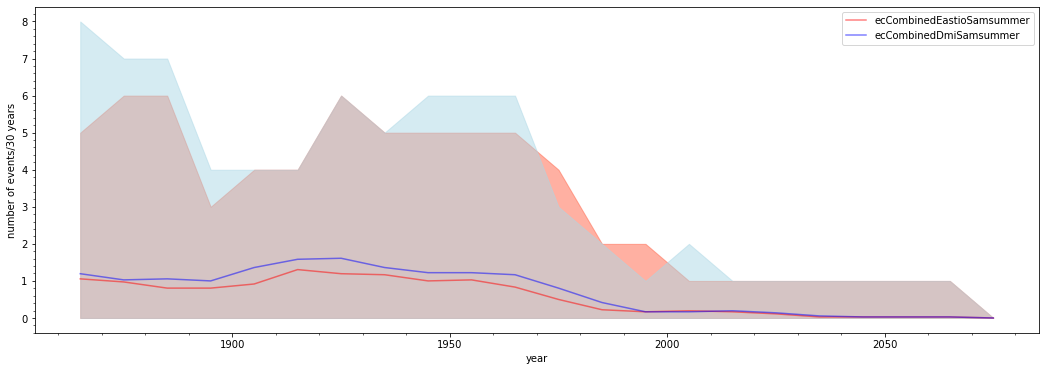

In [35]:
print('iod without Enso')
overlaidEmergePlot(
    overlapBinFireNeg.to_array().sel(compound='iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable'), 
    piControlFireNegBinSumXr.to_array().sel(compound='iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable')
)

